**▣ 디클라제 충전 경향성 분석 (BDV0709)_Rev.02**

>- 목표 : 충전수율 일탈 배치의 충전 공정 문제점을 확인하고자 함
>- 일탈 배치 : SGD20015
>- 분석 대상 : SGD20010~16
>- 관련 문서 : BDV0709 디클라제(SGD20015) 충전수율(65.4%) 기준수율(71.7%) 미달 건

# Define

## Step01 개선 기회 탐색
* 정보화된 시스템을 통해 분말 충전기 현황을 파악함

## Step02 개선 기회 발굴 및 과제 선정
* Y-y 전개 : 분말 충전 수율 개선 - 충전기 점검 포인트 도출
- 분석 대상 설비 : 충전기(FL-SG-101)
- 분석 대상 Data : 충전량 Rectrospective 분석

## Step03 Project Y 선정
* Project Y : 일탈 배치의 충전량 저하 원인 분석
* 실현 방안 : 최근 배치들의 분말 충전량/Loss량 분석

# Measure

## Step04 데이터 수집 및 검증 계획 수립

**데이터 수집 계획**

* 제품 : 디클라제
* 배치 : SGD20010~16
* 수집 기간 : '20년 10월 ~ 11월
* 변수 : 26 Columns

## Step05 데이터 Set 구성

In [133]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 20
rcParams['axes.unicode_minus'] = False


In [134]:
# Machine Learning Library

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

# accuracy measure
from sklearn import metrics

In [21]:
# 배치 SGD20010 Load

sgd10 = pd.read_excel('data/SGD20010.xlsx')
sgd11 = pd.read_excel('data/SGD20011.xlsx')
sgd12 = pd.read_excel('data/SGD20012.xlsx')
sgd13 = pd.read_excel('data/SGD20013.xlsx')
sgd14 = pd.read_excel('data/SGD20014.xlsx')
sgd15 = pd.read_excel('data/SGD20015.xlsx')
sgd16 = pd.read_excel('data/SGD20016.xlsx')
sgd10

,DATE,TIME,CODE,COUNT,CH-A DATA,UNIT,STATE,CODE.1,COUNT.1,CH-B DATA,...,UNIT.2,STD,AVE,MIN,MAX,MAX-MIN,ERROR,OVER,LOWER,UPPER
0,2020-10-15,08:31:27,14,1,0.0139,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-15,08:31:33,14,2,0.0138,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15,08:31:39,14,3,0.0141,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-15,08:31:46,14,4,0.0141,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15,08:31:52,14,5,0.0135,g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,2020-10-15,18:43:01,14,4618,0.0105,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4618,2020-10-15,18:43:07,14,4619,0.0093,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4619,2020-10-15,18:43:13,14,4620,0.0055,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4620,2020-10-15,18:43:19,14,4621,0.0037,g,L,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step06 데이터 취득 시스템(유용성)검증

* 정보화된 시스템을 통해 데이터 확보함
* 충전기(FL-SG-101) 에서 충전 데이터(.csv) Collection 

## Step07 프로세스 현수준 파악
- SGD20015 충전 목표량 : 0.0140g (0.0132g ~ 0.0148g)

 ## Step08 개선 목표 설정  
 
 * 충전기 불완전 요소 확인

# Analyze

## Step09 X인자 검증 계획 수립

* project Y : N/A
* x's : 신규 Column 생성

## Step10 데이터 취득 및 전처리 실시

In [26]:
col_list = ['TIME','COUNT','CH-A DATA','STATE']

In [27]:
df10 = sgd10[col_list]
df11 = sgd11[col_list]
df12 = sgd12[col_list]
df13 = sgd13[col_list]
df14 = sgd14[col_list]
df15 = sgd15[col_list]
df16 = sgd16[col_list]
df11

,TIME,COUNT,CH-A DATA,STATE
0,08:20:44,1,0.0143,NaN
1,08:20:50,2,0.0139,NaN
2,08:20:56,3,0.0133,NaN
3,08:21:02,4,0.0135,NaN
4,08:21:08,5,0.0141,NaN
...,...,...,...,...
4516,18:28:12,4517,0.0013,L
4517,18:28:18,4518,0.0019,L
4518,18:28:24,4519,0.0012,L
4519,18:28:30,4520,0.0022,L


In [32]:
# Typenumber 추가
# 0 -> 미량충전 / 1 -> 정상 / 2 -> 과충전

df10['TypeNum'] = df10['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
df11['TypeNum'] = df11['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
df12['TypeNum'] = df12['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
df13['TypeNum'] = df13['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
df14['TypeNum'] = df14['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
df15['TypeNum'] = df15['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
df16['TypeNum'] = df16['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
df16

<ipython-input-32-33ae6ae01100>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['TypeNum'] = df10['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
<ipython-input-32-33ae6ae01100>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['TypeNum'] = df11['STATE'].apply(lambda x: 0 if x == 'L' else 2 if x == 'U' else 1)
<ipython-input-32-33ae6ae01100>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,TIME,COUNT,CH-A DATA,STATE,TypeNum
0,08:31:41,1,0.0134,NaN,1
1,08:31:48,2,0.0145,NaN,1
2,08:31:55,3,0.0131,NaN,1
3,08:32:02,4,0.0144,NaN,1
4,08:32:10,5,0.0143,NaN,1
...,...,...,...,...,...
4461,18:50:51,4462,0.0092,L,0
4462,18:50:58,4463,0.0072,L,0
4463,18:51:05,4464,0.0043,L,0
4464,18:51:13,4465,0.0043,L,0


## Step11 데이터 탐색

* Graph 분석

In [19]:
import seaborn as sns; sns.set()

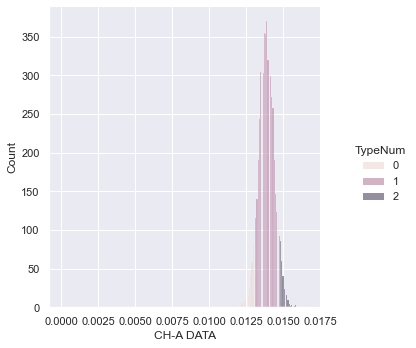

In [34]:
# 정상 배치 SGD20010

sns.displot(df10, x="CH-A DATA", hue="TypeNum")

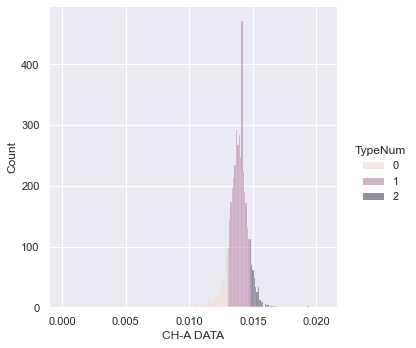

In [35]:
# 정상 배치 SGD20011

sns.displot(df11, x="CH-A DATA", hue="TypeNum")

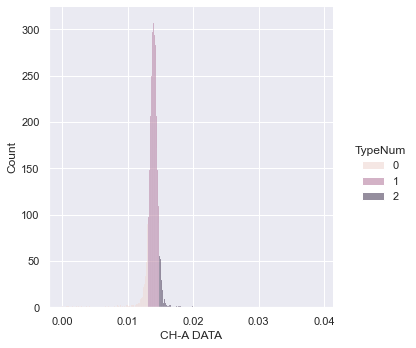

In [36]:
# 정상 배치 SGD20012

sns.displot(df12, x="CH-A DATA", hue="TypeNum")

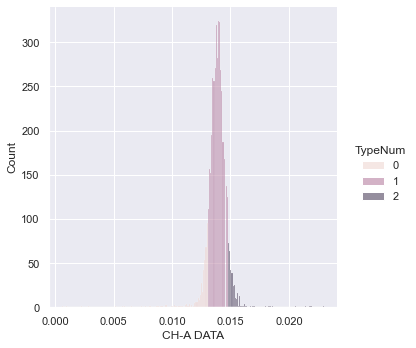

In [37]:
# 정상 배치 SGD20013

sns.displot(df13, x="CH-A DATA", hue="TypeNum")

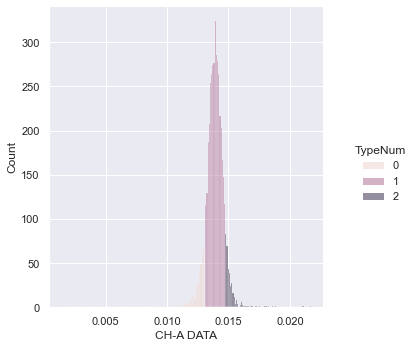

In [38]:
# 정상 배치 SGD20014

sns.displot(df14, x="CH-A DATA", hue="TypeNum")

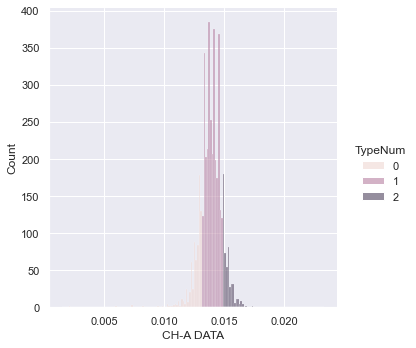

In [30]:
# 일탈 배치 SGD20015

sns.displot(df15, x="CH-A DATA", hue="TypeNum")

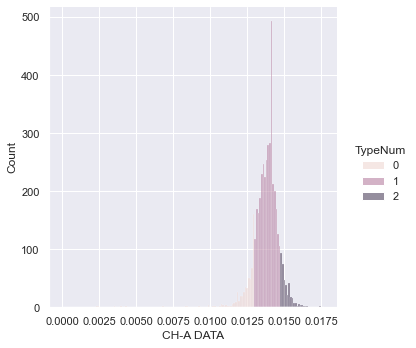

In [39]:
# 정상 배치 SGD20016

sns.displot(df16, x="CH-A DATA", hue="TypeNum")

## Step12 핵심인자 선정

- SGD20010~16 (대조군) 은 Type 1(적정충전)의 데이터가 정상형(정규분포)에 가까운 반면
- SGD20015 (일탈)은 Type 1(적정충전)의 데이터가 이빠진형, 쌍봉형에 가까움

## Step13 분석 모형 검토

* 각 배치별 적정 충전, 불량 충전 수량을 비교함

In [80]:
# 미량충전, 적정충전, 과충전 수량 확인

TN10 = pd.DataFrame(pd.value_counts(df10["TypeNum"]))
TN11 = pd.DataFrame(pd.value_counts(df11["TypeNum"]))
TN12 = pd.DataFrame(pd.value_counts(df12["TypeNum"]))
TN13 = pd.DataFrame(pd.value_counts(df13["TypeNum"]))
TN14 = pd.DataFrame(pd.value_counts(df14["TypeNum"]))
TN15 = pd.DataFrame(pd.value_counts(df15["TypeNum"]))
TN16 = pd.DataFrame(pd.value_counts(df16["TypeNum"]))
TN16

,TypeNum
1,3465
0,605
2,396


In [101]:
T10 = TN10.transpose()
T11 = TN11.transpose()
T12 = TN12.transpose()
T13 = TN13.transpose()
T14 = TN14.transpose()
T15 = TN15.transpose()
T16 = TN16.transpose()
T16

,1,0,2
TypeNum,3465,605,396


In [105]:
TZ = pd.concat([T10,T11,T12,T13,T14,T15,T16], axis=0)
TZ

,1,0,2
TypeNum,4076,292,254
TypeNum,3445,632,444
TypeNum,3667,452,255
TypeNum,3780,406,345
TypeNum,3712,409,364
TypeNum,3094,769,536
TypeNum,3465,605,396


<AxesSubplot:>

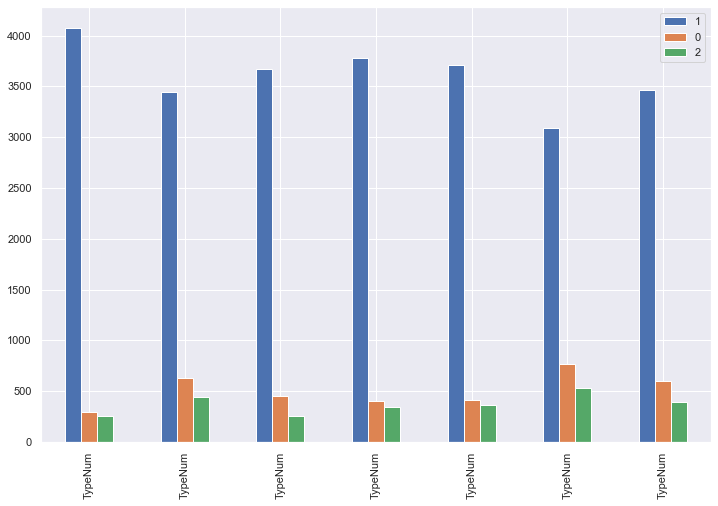

In [106]:
TZ.plot(kind='bar')

 - SGD20015 (일탈) 은 다른 정상 배치와 비교할 때
 - Type 1 (적정충전) 수량(v)이 적고, Type 0/2 (미량충전/과량충전) 수량(v)이 많음

# Improve

## Step14 최적 모형 수립

* 각 배치별 충전량 불량으로 인한 폐기량을 비교하고자 함

In [136]:
import matplotlib.pyplot as plt
from matplotlib import style

In [121]:
# 일탈 배치 미량충전, 적정충전, 과충전 Dataframe 분리

df10_0 = df10.loc[df10['TypeNum']==0]
df10_1 = df10.loc[df10['TypeNum']==1]
df10_2 = df10.loc[df10['TypeNum']==2]
df11_0 = df11.loc[df11['TypeNum']==0]
df11_1 = df11.loc[df11['TypeNum']==1]
df11_2 = df11.loc[df11['TypeNum']==2]
df12_0 = df12.loc[df12['TypeNum']==0]
df12_1 = df12.loc[df12['TypeNum']==1]
df12_2 = df12.loc[df12['TypeNum']==2]
df13_0 = df13.loc[df13['TypeNum']==0]
df13_1 = df13.loc[df13['TypeNum']==1]
df13_2 = df13.loc[df13['TypeNum']==2]
df14_0 = df14.loc[df14['TypeNum']==0]
df14_1 = df14.loc[df14['TypeNum']==1]
df14_2 = df14.loc[df14['TypeNum']==2]
df15_0 = df15.loc[df15['TypeNum']==0]
df15_1 = df15.loc[df15['TypeNum']==1]
df15_2 = df15.loc[df15['TypeNum']==2]
df16_0 = df16.loc[df16['TypeNum']==0]
df16_1 = df16.loc[df16['TypeNum']==1]
df16_2 = df16.loc[df16['TypeNum']==2]

In [126]:
# 각 배치별 미량충전(폐기) + 과량 충전(폐기) 분말 총합 비교

S10 = sum(df10_0['CH-A DATA']) + sum(df10_2['CH-A DATA'])
S11 = sum(df11_0['CH-A DATA']) + sum(df11_2['CH-A DATA'])
S12 = sum(df12_0['CH-A DATA']) + sum(df12_2['CH-A DATA'])
S13 = sum(df13_0['CH-A DATA']) + sum(df13_2['CH-A DATA'])
S14 = sum(df14_0['CH-A DATA']) + sum(df14_2['CH-A DATA'])
S15 = sum(df15_0['CH-A DATA']) + sum(df15_2['CH-A DATA'])
S16 = sum(df16_0['CH-A DATA']) + sum(df16_2['CH-A DATA'])
S16

13.203100000000003

In [139]:
S14_list = [S10,S11,S12,S13,S14,S15,S16]
S14_List = pd.DataFrame(S14_list)

S14_List

,0
0,7.4038
1,14.3334
2,9.3812
3,10.2692
4,10.5122
5,17.7400
6,13.2031


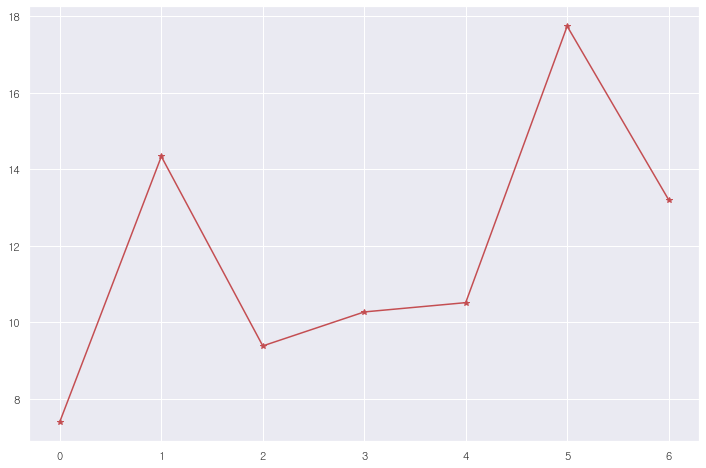

In [144]:
plt.plot(S14_List, marker='*', color = 'r')
plt.show()

## Step15 모형 검증 및 최적화

- 일탈 배치 폐기량 기술

In [120]:
# 일탈 배치 미량충전, 적정충전, 과충전 Dataframe 분리

df15_0 = df15.loc[df15['TypeNum']==0]
df15_1 = df15.loc[df15['TypeNum']==1]
df15_2 = df15.loc[df15['TypeNum']==2]

In [114]:
# 일탈 배치 미량충전(폐기) 분말 총합 9.5156g

sum(df15_0['CH-A DATA'])

9.51559999999999

In [116]:
# 일탈 배치 과충전(폐기) 분말 총합 8.2244g

sum(df15_2['CH-A DATA'])

8.224399999999989

## Step16 개선 결과 검증(Pilot Test)

In [117]:
# 일탈 배치 충전 못하고 페기된 분말량 : 22.768g

9.5156 + 8.2244 + 1.128 + 3.9

22.767999999999997

일탈 배치 폐기된 양 총합 22.768g

- 9.5156 g : 미량충전(폐기) 분말 총합
- 8.2244 g : 과충전(폐기) 분말 총합
- 1.128 g : 메인 호퍼 내부 잔류 분말량
- 3.9 g : Auger 잔류 분말량

# Control

## Step17 최적모형 모니터링

 폐기량 비교

In [123]:
# SGD20015 (일탈) 은 SGD20013(대조군) 보다 충전 불량으로 인한 폐기량이 7.471g 많음

sum(df15_0['CH-A DATA']) + sum(df15_2['CH-A DATA']) - (sum(df13_0['CH-A DATA']) + sum(df13_2['CH-A DATA']))

7.470799999999986

적정 충전량 비교

In [127]:
# 일탈 배치 적정충전 분말 총합 43.2613g

sum(df_1['CH-A DATA'])

43.261300000000034

In [129]:
# 정상 배치 적정충전 분말 총합 52.5540g

sum(df2_1['CH-A DATA'])

52.55400000000001

## Step18 표준화 및 수평전개 

일탈 배치(SGD20015)

- 66 g (총 분말량) = 43.2613g (충전된 양) + 22.768g (폐기된 양)

In [146]:
43.2613 + 22.768

66.0293

정상 배치(SGD20013)

- 68 g (총 분말량) = 52.5540g (충전된 양) + 15.475g (폐기된 양)

In [147]:
52.5540 + 15.475

68.029

--- end of script ---